# Performance of Predator-Prey network
### Comparing ANN and SNN (with frames-, Poisson-, and DVS-input)

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [2]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'xx-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'jpg'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [3]:
log_dir = '/home/rbodo/.snntoolbox/data/predator_prey/log'

runlabel_analog = '41'  # Analog input with frames that discard polarity
runlabel_poisson = '43'  # Poisson
runlabel_poisson5000 = '42'  # Poisson input with 5000 events
runlabel_dvs = '44'  # Maxpool subsampling

path_analog = os.path.join(log_dir, 'gui', runlabel_analog)
path_poisson = os.path.join(log_dir, 'gui', runlabel_poisson)
path_poisson5000 = os.path.join(log_dir, 'gui', runlabel_poisson5000)
path_dvs = os.path.join(log_dir, 'gui', runlabel_dvs)

In [4]:
exp_analog = ExpResults(path_analog, 'Analog', '.')
exp_poisson = ExpResults(path_poisson, 'Poisson', '+', 'g', 2)
# exp_poisson5000 = ExpResults(path_poisson5000, 'Poisson 5000', '^', (0, 0.33, 0), 2)
exp_dvs = ExpResults(path_dvs, 'DVS', 'x', 'r')

experiments = [exp_analog, exp_poisson, exp_dvs]

Using TensorFlow backend.


## Plot error vs operations

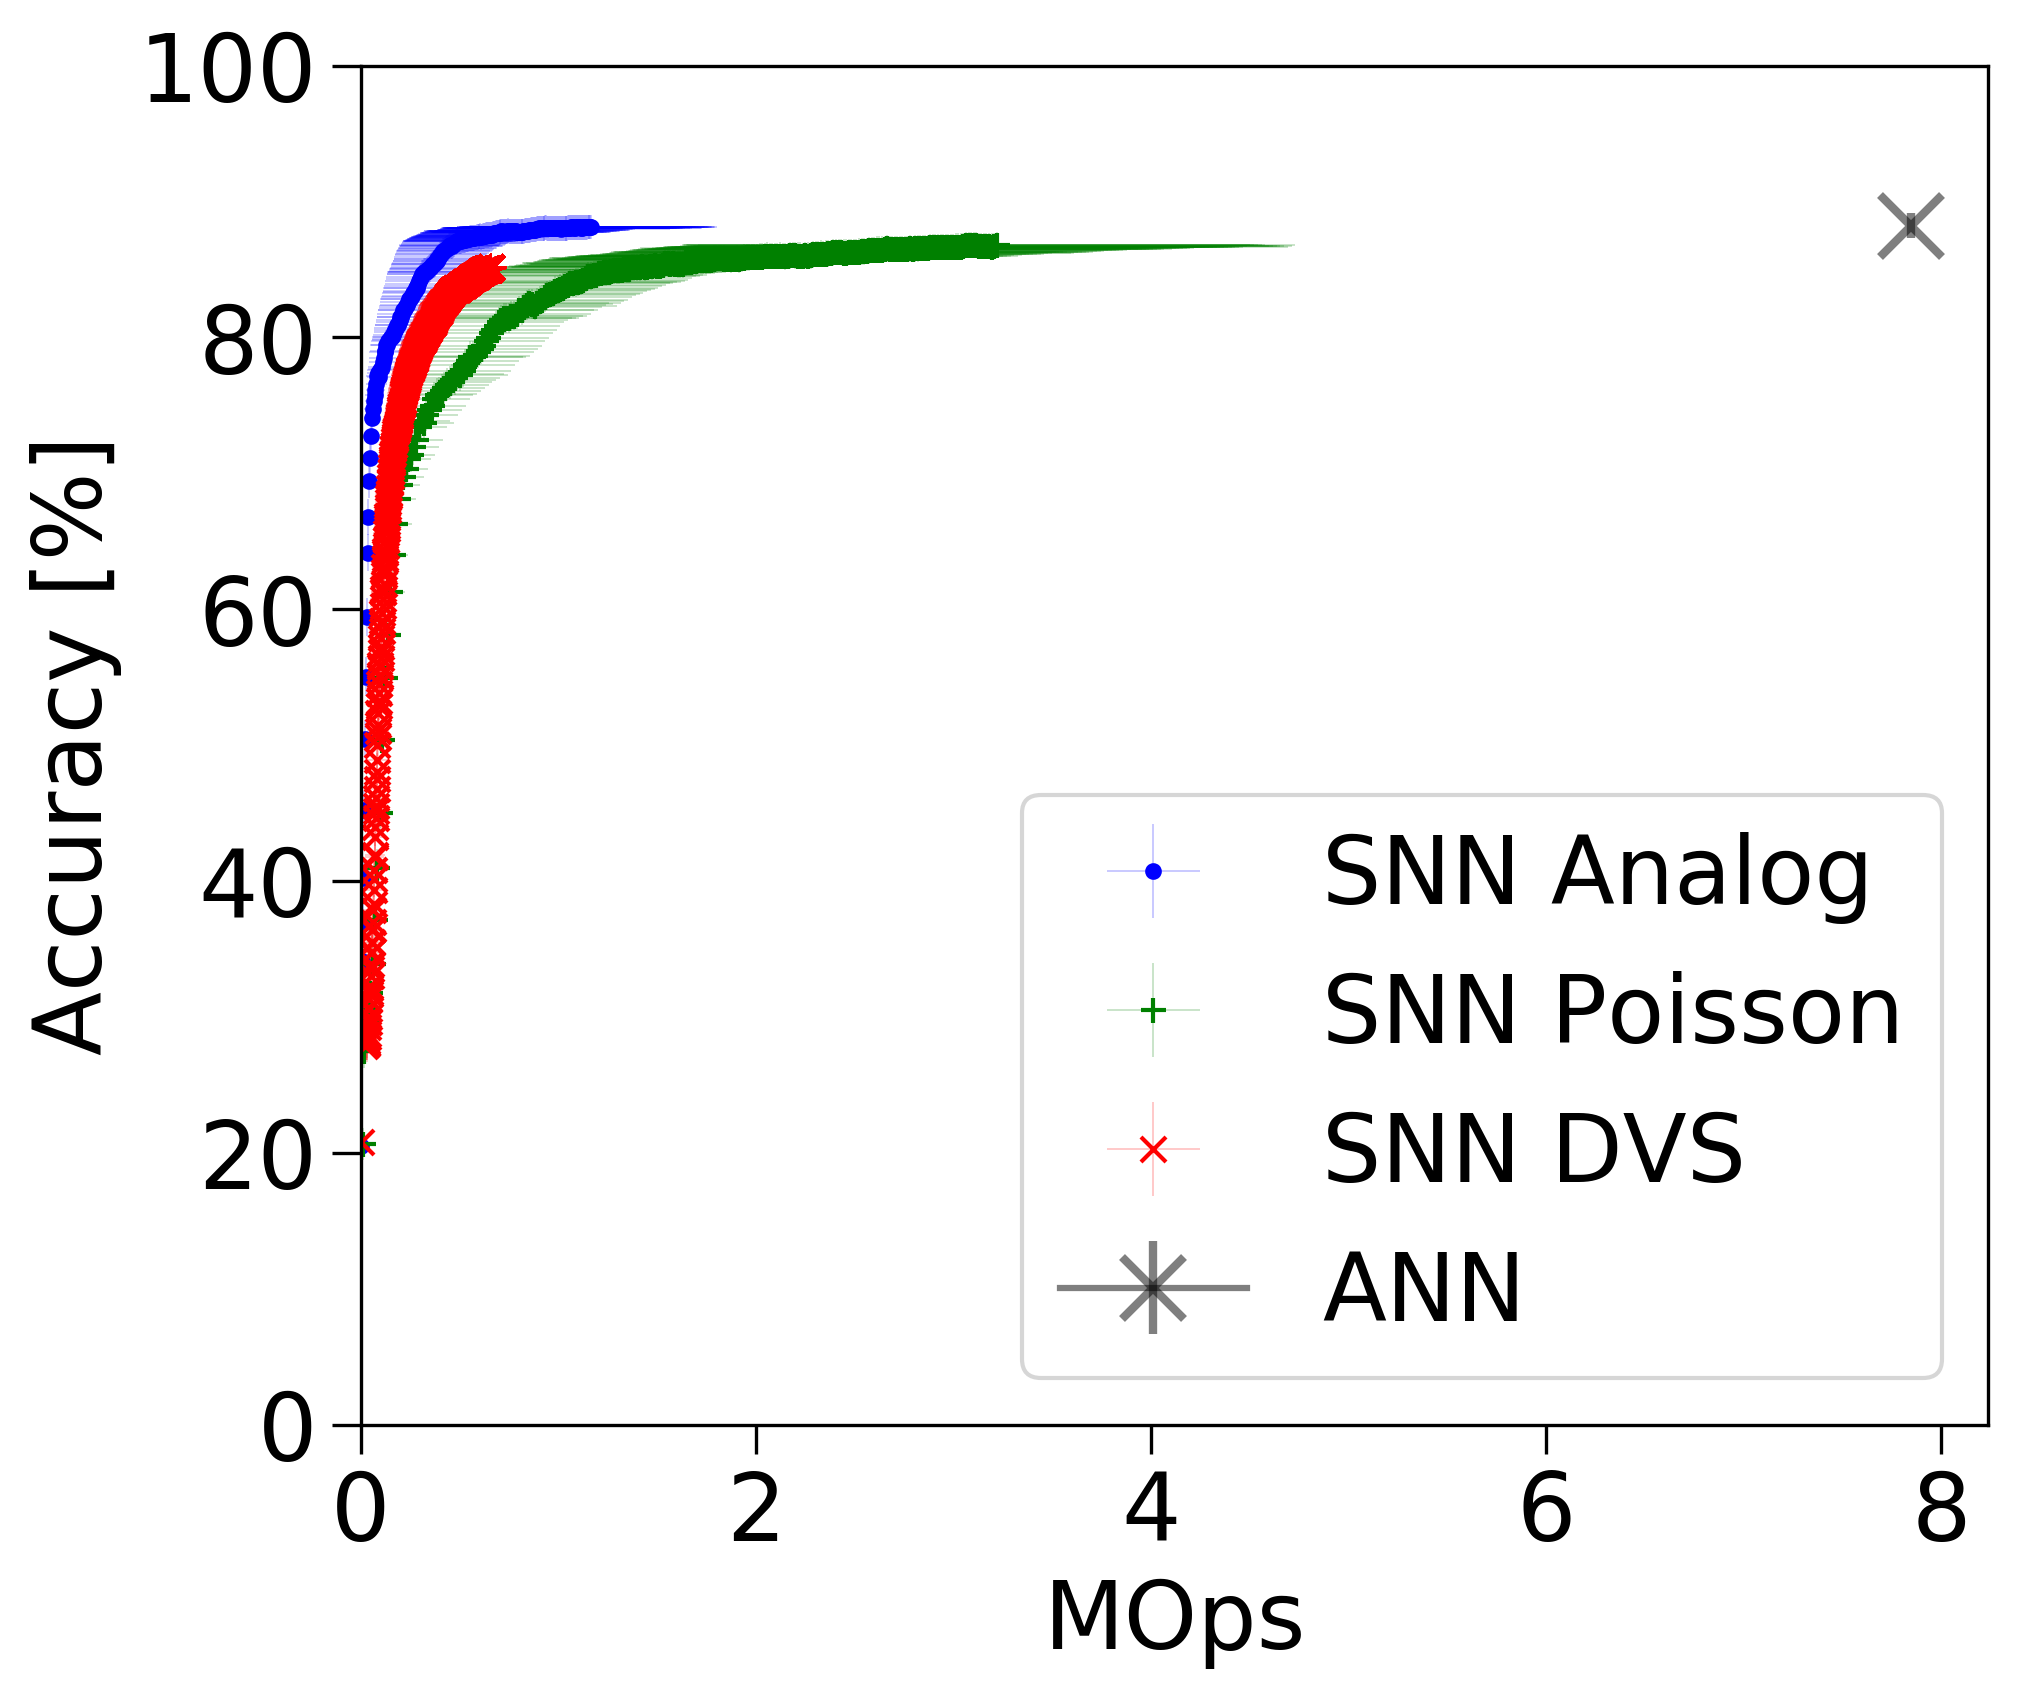

In [6]:
show_numbers = False

for exp in experiments:
    plt.errorbar(exp.mean_computations_t, 100-exp.e1_mean, xerr=exp.std_computations_t,
                 yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

    if show_numbers:
        plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.7, exp.e1_ann + 5), fontsize=16, color=exp.color1)
        plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.op1_1, exp.e1_1), xy=(exp.op1_1, exp.e1_1),
                 xytext=(exp.op1_1, exp.e1_1 + 10), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)


plt.errorbar(exp.operations_ann, 100-exp.e1_ann, marker='x', label='ANN', color='black', markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)


plt.ylim(0, 100)
plt.xlim(0, None)
plt.ylabel('Accuracy [%]')
plt.xlabel('MOps')
plt.legend(loc='lower right')
# plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [8]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('SNN top-1 converged:        ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_1, exp.e1_1))
    print('SNN top-1 jointly optimal:  ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_optimal, exp.e1_optimal))
    print('SNN top-1 same op:           ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_2, exp.e1_2))
    print('')

Analog
ANN top-1:                         (7.84544 MOps/frame, 11.75 %)
SNN top-1 best error:         (1.14714 MOps/frame, 11.88 %)
SNN top-1 converged:        (0.49367 MOps/frame, 12.88 %)
SNN top-1 jointly optimal:  (0.12900 MOps/frame, 20.58 %)
SNN top-1 same op:           (1.14714 MOps/frame, 11.88 %)

Poisson
ANN top-1:                         (7.84544 MOps/frame, 11.75 %)
SNN top-1 best error:         (3.06293 MOps/frame, 13.23 %)
SNN top-1 converged:        (1.78505 MOps/frame, 14.21 %)
SNN top-1 jointly optimal:  (0.38358 MOps/frame, 24.23 %)
SNN top-1 same op:           (3.06293 MOps/frame, 13.23 %)

Poisson 5000
ANN top-1:                         (7.84544 MOps/frame, 11.75 %)
SNN top-1 best error:         (0.78858 MOps/frame, 16.90 %)
SNN top-1 converged:        (0.74003 MOps/frame, 17.88 %)
SNN top-1 jointly optimal:  (0.18690 MOps/frame, 31.31 %)
SNN top-1 same op:           (0.78858 MOps/frame, 16.90 %)

DVS
ANN top-1:                         (7.84544 MOps/frame, 11.77 %)
